# LOAD THE DATA

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [79]:
# Load the data
orders = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\ORDERS.csv')
products = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\PRODUCTS.csv')
customers = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\CUSTOMERS.csv')
order_details = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\ORDER_DETAILS.csv')
employees = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\EMPLOYEES.csv')
shippers = pd.read_csv(r'C:\Users\Hp\Desktop\PYTHON DATA CLASS\NORTHWIND NU\SHIPPERS.csv')


# CLEANING THE DATA AND PREPROCESSING

## Handle Missing Values: Check for and handle missing data.

In [80]:
# Check for missing values
print(orders.isnull().sum())
print(products.isnull().sum())
print(customers.isnull().sum())
print(order_details.isnull().sum())
print(employees.isnull().sum())

# Fill or drop missing values (example: filling)
orders.fillna({'ShipCity': 'Unknown'}, inplace=True)


OrderID             0
CustomerID          0
EmployeeID          0
OrderDate           0
RequiredDate        0
ShippedDate        21
ShipVia             0
Freight             0
ShipName            0
ShipAddress         0
ShipCity            0
ShipRegion        507
ShipPostalCode     19
ShipCountry         0
dtype: int64
ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64
CustomerID       0
CompanyName      0
ContactName      0
ContactTitle     0
Address          2
City             2
Region          62
PostalCode       3
Country          2
Phone            2
Fax             24
dtype: int64
OrderID      0
ProductID    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64
EmployeeID         0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0

## Normalize Data: Standardize column names and formats (e.g., lowercase, underscores).

In [81]:
# Rename columns to match
orders.rename(columns={'OrderID': 'order_id'}, inplace=True)
order_details.rename(columns={'OrderID': 'order_id'}, inplace=True)


In [82]:
print(orders['order_id'].dtype)
print(order_details['order_id'].dtype)

# If data types are different, convert them to match
orders['order_id'] = orders['order_id'].astype(str)
order_details['order_id'] = order_details['order_id'].astype(str)


int64
int64


In [83]:
# Rename columns to a uniform format
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
products.columns = products.columns.str.lower().str.replace(' ', '_')


## Merge Data for Analysis: Combine datasets for meaningful analysis.

In [84]:
# Merge orders with order details
orders_details_combined = pd.merge(orders, order_details, on='order_id')

In [85]:
print(orders_details_combined.head())


  order_id customerid  employeeid            orderdate         requireddate  \
0    10248      VINET           5  1996-07-04 00:00:00  1996-08-01 00:00:00   
1    10248      VINET           5  1996-07-04 00:00:00  1996-08-01 00:00:00   
2    10248      VINET           5  1996-07-04 00:00:00  1996-08-01 00:00:00   
3    10249      TOMSP           6  1996-07-05 00:00:00  1996-08-16 00:00:00   
4    10249      TOMSP           6  1996-07-05 00:00:00  1996-08-16 00:00:00   

           shippeddate  shipvia  freight                   shipname  \
0  1996-07-16 00:00:00        3    32.38  Vins et alcools Chevalier   
1  1996-07-16 00:00:00        3    32.38  Vins et alcools Chevalier   
2  1996-07-16 00:00:00        3    32.38  Vins et alcools Chevalier   
3  1996-07-10 00:00:00        1    11.61          Toms Spezialitten   
4  1996-07-10 00:00:00        1    11.61          Toms Spezialitten   

          shipaddress shipcity shipregion shippostalcode shipcountry  \
0  59 rue de l-Abbaye    R

In [86]:
# Merge orders_details_combined with products
data = pd.merge(orders_details_combined, products, left_on='ProductID', right_on='productid')  # Update as needed

# Merge the result with customers
data = pd.merge(data, customers, left_on='customerid', right_on='CustomerID')  # Update as needed


* The dataset consists of various CSV files, including Orders, Products, Customers, Order Details, Employees, and Shippers.
* Data is cleaned by handling missing values (e.g., filling missing ShipCity values) and ensuring consistent column names and formats.
* Data types are aligned for consistent analysis, such as converting order_id to a string in both Orders and Order Details tables.
* Multiple datasets are merged into a comprehensive dataset for further analysis.

# CUSTOMER SEGMENTATION

In [87]:
# Create total amount spent per order
data['total_amount'] = data['UnitPrice'] * data['Quantity']


## Customer-Level Metrics

In [88]:
customer_segmentation = data.groupby('customerid').agg({
    'order_id': 'nunique',         # Number of unique orders
    'total_amount': 'sum',         # Total spending per customer
    'Quantity': 'sum'              # Total quantity purchased
}).reset_index()

# Rename the columns for clarity
customer_segmentation.rename(columns={
    'order_id': 'num_orders',
    'total_amount': 'total_spent',
    'Quantity': 'total_quantity'
}, inplace=True)

# Inspect the first few rows of the customer segmentation DataFrame
print(customer_segmentation.head())


  customerid  num_orders  total_spent  total_quantity
0      ANATR           2       568.55              24
1      ANTON           4      5522.95             217
2      AROUT           4      3974.90             241
3      BERGS           7     10289.30             427
4      BLAUS           4      1079.80              68


## Segmentation Using K-means Clustering

In [89]:
# Standardize the data for clustering
scaler = StandardScaler()
segmentation_data = customer_segmentation[['num_orders', 'total_spent', 'total_quantity']]
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Apply K-means clustering (you can adjust n_clusters based on your preference)
kmeans = KMeans(n_clusters=4, random_state=42) 
customer_segmentation['cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Check the segmentation results
print(customer_segmentation.head())


  customerid  num_orders  total_spent  total_quantity  cluster
0      ANATR           2       568.55              24        1
1      ANTON           4      5522.95             217        3
2      AROUT           4      3974.90             241        3
3      BERGS           7     10289.30             427        3
4      BLAUS           4      1079.80              68        1


## Visualize the Segments

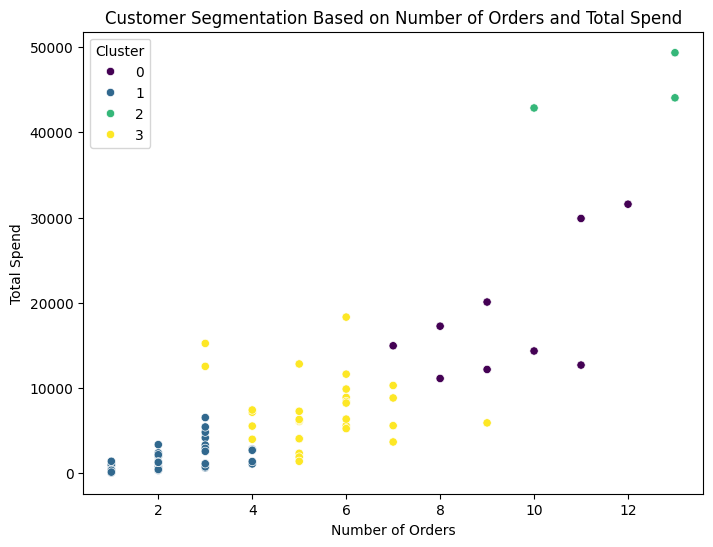

In [90]:
# Visualize the segmentation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_segmentation, x='num_orders', y='total_spent', hue='cluster', palette='viridis')
plt.title('Customer Segmentation Based on Number of Orders and Total Spend')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()



In [91]:
# Calculate average values for each cluster
cluster_summary = customer_segmentation.groupby('cluster').agg({
    'num_orders': 'mean',
    'total_spent': 'mean',
    'total_quantity': 'mean'
}).reset_index()

print(cluster_summary)


   cluster  num_orders   total_spent  total_quantity
0        0    9.444444  18226.277778      697.666667
1        1    2.186047   1599.892791       76.488372
2        2   12.000000  45416.413333     1836.666667
3        3    5.433333   7361.817667      299.800000


* Total Amount Spent per order is calculated by multiplying UnitPrice with Quantity.
* Customer-level metrics such as the number of orders, total spending, and total quantity purchased are aggregated.
* K-means clustering is applied to segment customers based on their purchase behavior, grouping them into 4 clusters.
* Visualizations show customer distribution by total spend and number of orders across segments.

In [92]:
# Ensure order_date is in datetime format
data['orderdate'] = pd.to_datetime(data['orderdate'])

# Check the data structure
print(data[['customerid', 'order_id', 'orderdate', 'total_amount']].head())


  customerid order_id  orderdate  total_amount
0      VINET    10248 1996-07-04         168.0
1      VINET    10248 1996-07-04          98.0
2      VINET    10248 1996-07-04         174.0
3      TOMSP    10249 1996-07-05         167.4
4      TOMSP    10249 1996-07-05        1696.0


In [93]:
# Reference date for analysis (e.g., latest order date in the data)
reference_date = data['orderdate'].max()
print("Reference date:", reference_date)


Reference date: 1997-08-08 00:00:00


In [94]:
# RFM calculation
rfm = data.groupby('customerid').agg({
    'orderdate': lambda x: (reference_date - x.max()).days,  # Recency: days since last purchase
    'order_id': 'nunique',                                   # Frequency: number of orders
    'total_amount': 'sum'                                    # Monetary: total spent
}).reset_index()

# Rename columns for clarity
rfm.rename(columns={
    'orderdate': 'recency',
    'order_id': 'frequency',
    'total_amount': 'monetary'
}, inplace=True)

print(rfm.head())


  customerid  recency  frequency  monetary
0      ANATR        0          2    568.55
1      ANTON       50          4   5522.95
2      AROUT       65          4   3974.90
3      BERGS       51          7  10289.30
4      BLAUS       10          4   1079.80


In [95]:
# Assign RFM scores
rfm['recency_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])  # Lower recency is better
rfm['frequency_score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])  # Higher frequency is better
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])  # Higher monetary is better

# Combine scores to create an RFM segment
rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)

print(rfm.head())


  customerid  recency  frequency  monetary recency_score frequency_score  \
0      ANATR        0          2    568.55             4               1   
1      ANTON       50          4   5522.95             3               2   
2      AROUT       65          4   3974.90             2               2   
3      BERGS       51          7  10289.30             3               4   
4      BLAUS       10          4   1079.80             4               2   

  monetary_score rfm_segment  
0              1         411  
1              3         323  
2              3         223  
3              4         344  
4              1         421  


   rfm_segment     recency  frequency      monetary  customer_count
0          111  245.375000   1.250000    531.650000               8
1          112  217.000000   1.666667   1879.866667               3
2          121  333.000000   3.000000    920.300000               2
3          122  136.750000   3.750000   2887.950000               4
4          124  135.000000   3.000000  15224.500000               1
5          133  129.000000   5.000000   7262.300000               1
6          134  168.000000   5.500000  10849.550000               2
7          211   94.000000   1.400000    461.940000               5
8          212   86.500000   2.000000   1624.700000               2
9          222   79.000000   3.000000   1129.200000               1
10         223   85.000000   3.200000   4976.470000               5
11         224   66.000000   3.000000  12530.400000               1
12         233   92.500000   5.500000   6321.350000               2
13         234   87.500000   6.000000  10744.400

C:\Users\Hp\AppData\Local\Temp\ipykernel_616\2237917469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_summary, x='rfm_segment', y='customer_count', palette='viridis')


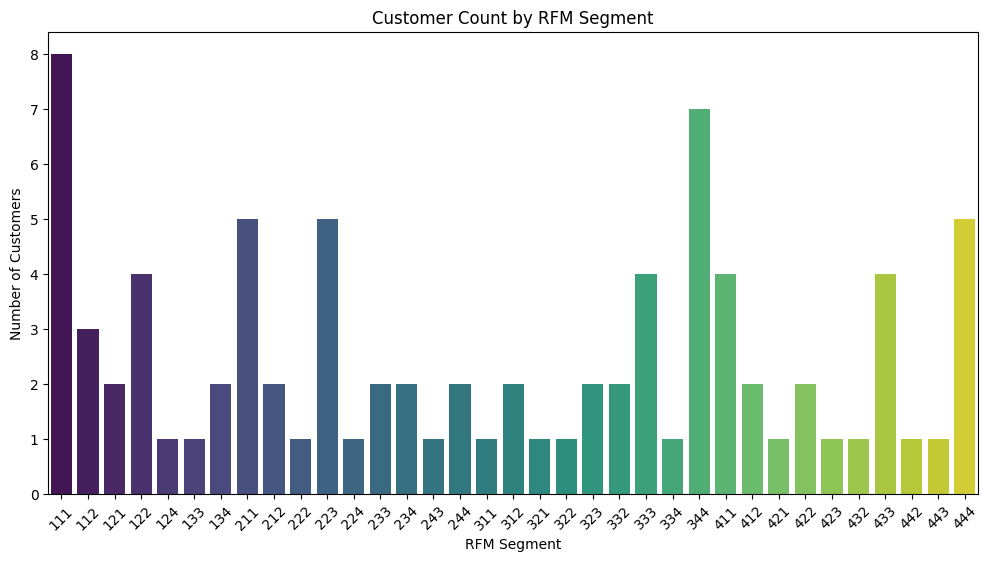

In [96]:
# Summarize RFM segments
rfm_summary = rfm.groupby('rfm_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customerid': 'count'
}).rename(columns={'customerid': 'customer_count'}).reset_index()

print(rfm_summary)



# Visualize RFM segmentation
plt.figure(figsize=(12, 6))
sns.barplot(data=rfm_summary, x='rfm_segment', y='customer_count', palette='viridis')
plt.title('Customer Count by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


* A Recency, Frequency, and Monetary (RFM) model is created to evaluate customer loyalty.
* Customers are scored and segmented based on recency (time since last purchase), frequency (number of purchases), and monetary value (total spent).
* RFM segments are visualized, showing the distribution of customers across different segments.

# OPERATIONAL ANALYSIS

## Order Processing Analysis

* Average fulfillment time and delay rates.
* Visualized fulfillment time distribution.

In [97]:
# Ensure dates are in datetime format
data['orderdate'] = pd.to_datetime(data['orderdate'])
data['shippeddate'] = pd.to_datetime(data['shippeddate'])
data['requireddate'] = pd.to_datetime(data['requireddate'])

# Calculate fulfillment time
data['fulfillment_time'] = (data['shippeddate'] - data['orderdate']).dt.days

# Check for delays
data['delay'] = (data['shippeddate'] > data['requireddate'])

# Aggregate statistics
fulfillment_summary = data['fulfillment_time'].describe()
delay_rate = data['delay'].mean() * 100  # Percentage of delayed orders

print("Fulfillment Summary:")
print(fulfillment_summary)
print(f"Delay Rate: {delay_rate:.2f}%")


Fulfillment Summary:
count    1000.000000
mean        8.400000
std         6.913161
min         1.000000
25%         4.000000
50%         7.000000
75%         9.000000
max        35.000000
Name: fulfillment_time, dtype: float64
Delay Rate: 4.70%


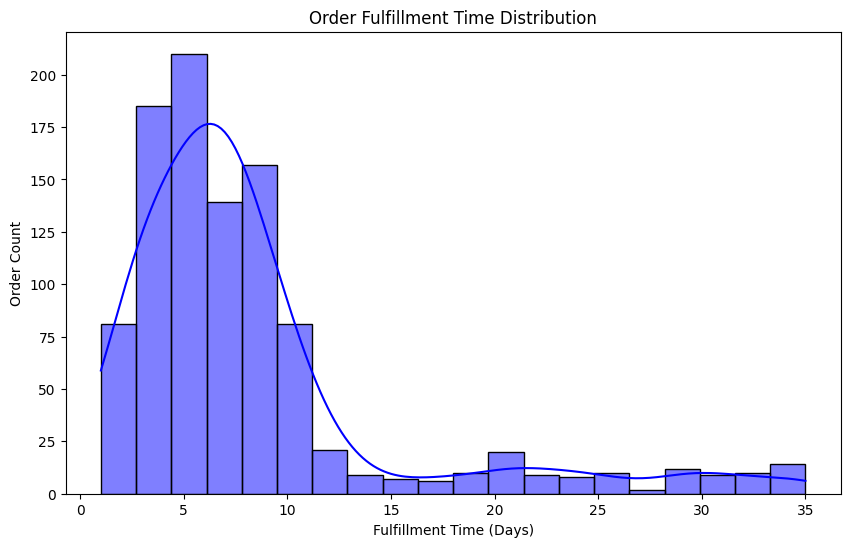

In [98]:
# Fulfillment time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['fulfillment_time'], bins=20, kde=True, color='blue')
plt.title('Order Fulfillment Time Distribution')
plt.xlabel('Fulfillment Time (Days)')
plt.ylabel('Order Count')
plt.show()


## Product Performance Analysis

* Top products by revenue and quantity.

In [99]:
# Calculate product performance
product_performance = data.groupby('productid').agg({
    'total_amount': 'sum',  # Total revenue
    'Quantity': 'sum'       # Total quantity sold
}).reset_index()

# Merge with product names
product_performance = pd.merge(product_performance, products[['productid', 'productname']], on='productid')

# Sort by revenue
top_products = product_performance.sort_values(by='total_amount', ascending=False).head(10)

print("Top 10 Products by Revenue:")
print(top_products)


Top 10 Products by Revenue:
    productid  total_amount  Quantity             productname
37         38      73569.20       333            Cte de Blaye
58         59      32626.00       702    Raclette Courdavault
28         29      24851.08       238  Thringer Rostbratwurst
59         60      23528.00       790       Camembert Pierrot
55         56      23157.20       685  Gnocchi di nonna Alice
61         62      20001.40       478          Tarte au sucre
16         17      18712.20       548            Alice Mutton
50         51      16652.60       356   Manjimup Dried Apples
71         72      13558.80       456  Mozzarella di Giovanni
27         28      12957.60       335        Rssle Sauerkraut


C:\Users\Hp\AppData\Local\Temp\ipykernel_616\3447186235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='total_amount', y='productname', palette='viridis')


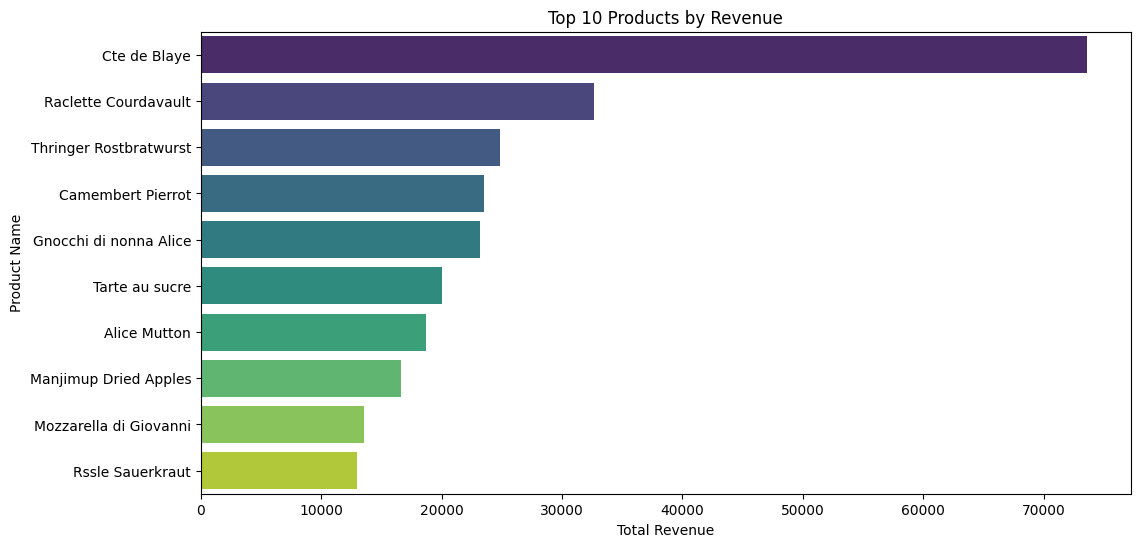

In [100]:
# Top products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='total_amount', y='productname', palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()


## Sales Trends Analysis

* Sales trends by month/year.

In [101]:
# Extract month and year
data['year_month'] = data['orderdate'].dt.to_period('M')

# Monthly revenue
monthly_sales = data.groupby('year_month').agg({'total_amount': 'sum'}).reset_index()

print("Monthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
   year_month  total_amount
0     1996-07      30192.10
1     1996-08      26609.40
2     1996-09      27636.00
3     1996-10      41203.60
4     1996-11      49704.00
5     1996-12      50953.40
6     1997-01      66692.80
7     1997-02      41207.20
8     1997-03      39979.90
9     1997-04      55699.39
10    1997-05      56823.70
11    1997-06      39088.00
12    1997-07      55464.93
13    1997-08       8681.24


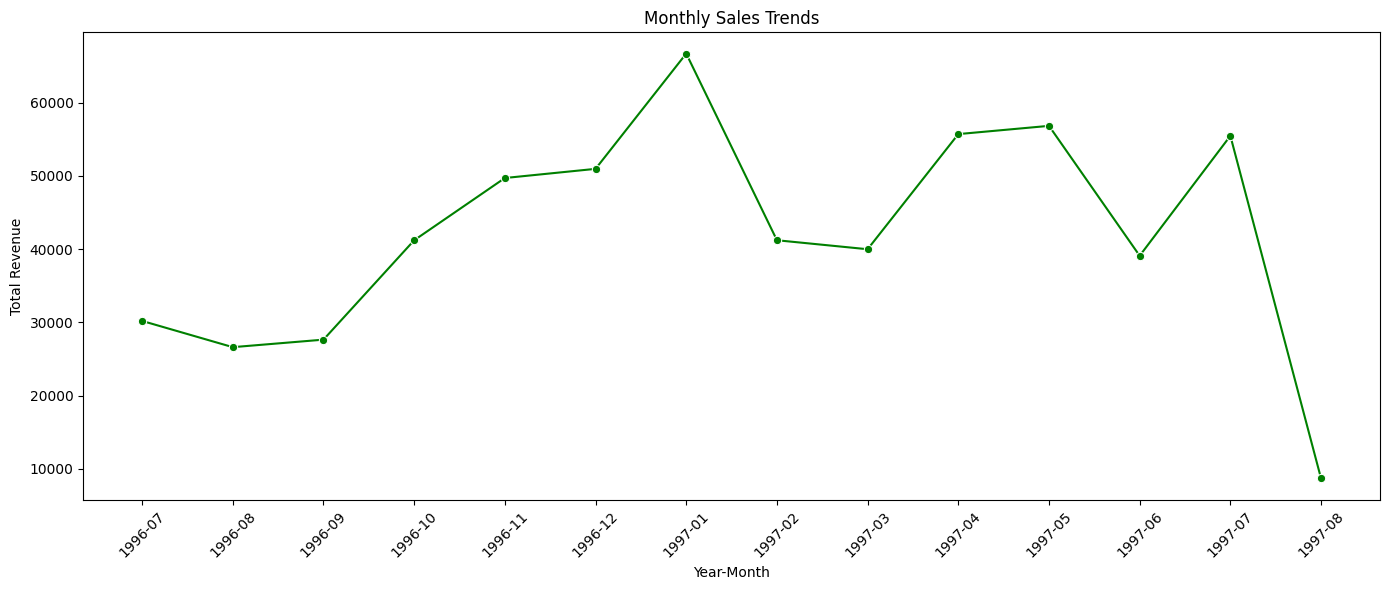

In [102]:
# Convert year_month to string
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Ensure total_amount is numeric
monthly_sales['total_amount'] = pd.to_numeric(monthly_sales['total_amount'], errors='coerce')

# Drop rows with NaN values in total_amount (if any)
monthly_sales = monthly_sales.dropna(subset=['total_amount'])

# Plot sales trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='total_amount', marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Order Processing: The average fulfillment time and delay rates are calculated, with visualizations showing the distribution of fulfillment times and delays.
* Product Performance: Revenue and quantity sold are analyzed for each product, identifying the top 10 products by revenue. Visuals show product sales trends over time.
* Sales Trends: Monthly sales trends are visualized, showing total revenue for each month.

## Logistics Efficiency Analysis

### Regional analysis of fulfillment time and shipping costs.

In [103]:
# Group by region
logistics_analysis = data.groupby('shipregion').agg({
    'fulfillment_time': 'mean',  # Average fulfillment time
    'freight': 'mean',           # Average shipping cost
    'delay': 'mean'              # Delay rate
}).reset_index()

# Convert delay rate to percentage
logistics_analysis['delay_rate'] = logistics_analysis['delay'] * 100
logistics_analysis.drop(columns='delay', inplace=True)

print("Logistics Analysis by Region:")
print(logistics_analysis)


Logistics Analysis by Region:
       shipregion  fulfillment_time     freight  delay_rate
0              AK         16.500000  128.097500    0.000000
1              BC          7.631579   28.397368    0.000000
2              CA          9.000000   13.730000    0.000000
3        Co. Cork         14.413793   65.626552   31.034483
4              DF          3.000000   66.290000    0.000000
5           Essex          4.666667   50.182500    0.000000
6              ID          7.189189  225.025946    0.000000
7   Isle of Wight          6.181818   20.370000    0.000000
8            Lara          7.550000   61.197000    0.000000
9              MT         12.000000   94.800000    0.000000
10             NM          6.848485  155.033030    0.000000
11  Nueva Esparta          8.000000   58.524000    0.000000
12             OR          6.375000   32.890417    0.000000
13          Qubec          5.300000  133.520333    0.000000
14             RJ          7.948718   52.479744    0.000000
15        

C:\Users\Hp\AppData\Local\Temp\ipykernel_616\4075428660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=logistics_analysis, x='shipregion', y='fulfillment_time', palette='coolwarm')


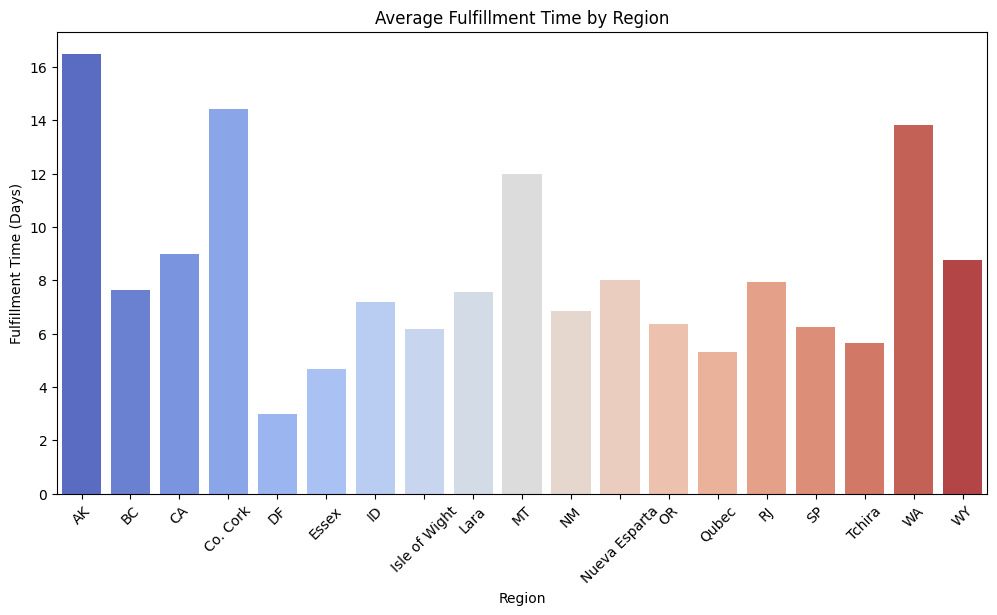

In [104]:
# Fulfillment time by region
plt.figure(figsize=(12, 6))
sns.barplot(data=logistics_analysis, x='shipregion', y='fulfillment_time', palette='coolwarm')
plt.title('Average Fulfillment Time by Region')
plt.xlabel('Region')
plt.ylabel('Fulfillment Time (Days)')
plt.xticks(rotation=45)
plt.show()


* Regional analysis highlights average fulfillment times and shipping costs across regions.
* The delay rate is calculated as a percentage, and fulfillment times are analyzed by region.

## Product Performance Analysis

In [105]:
# Merge orders and order details
data = pd.merge(order_details, orders, on='order_id')

data.columns = data.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()

data = pd.merge(data, products, left_on='productid', right_on='productid', how='inner')

# Merge with product names
data = pd.merge(data, products, on='productid')
data['Sales'] = data['unitprice'] * data['quantity']
data['orderdate'] = pd.to_datetime(data['orderdate'], errors='coerce')

In [106]:
# Extract the month for trend analysis
data['Month'] = data['orderdate'].dt.to_period('M')

data['orderdate'] = pd.to_datetime(data['orderdate'], errors='coerce')  # Convert to datetime if necessary
data['Month'] = data['orderdate'].dt.to_period('M')  # Extract month as a period (Year-Month)

data = pd.merge(data, products, on='productid', suffixes=('', '_drop'))
data = data.drop(columns=[col for col in data if col.endswith('_drop')])  # Drop any unwanted suffix columns

data['orderdate'] = pd.to_datetime(data['orderdate'], errors='coerce')  # Convert to datetime if necessary
data['Month'] = data['orderdate'].dt.to_period('M')  # Extract month as a period (Year-Month)

# Calculate 'Sales' column
data['Sales'] = data['unitprice'] * data['quantity']

# Aggregate sales by Product and Month
product_sales = data.groupby(['productid', 'productname', 'Month'])['Sales'].sum().reset_index()

C:\Users\Hp\AppData\Local\Temp\ipykernel_616\3828071811.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


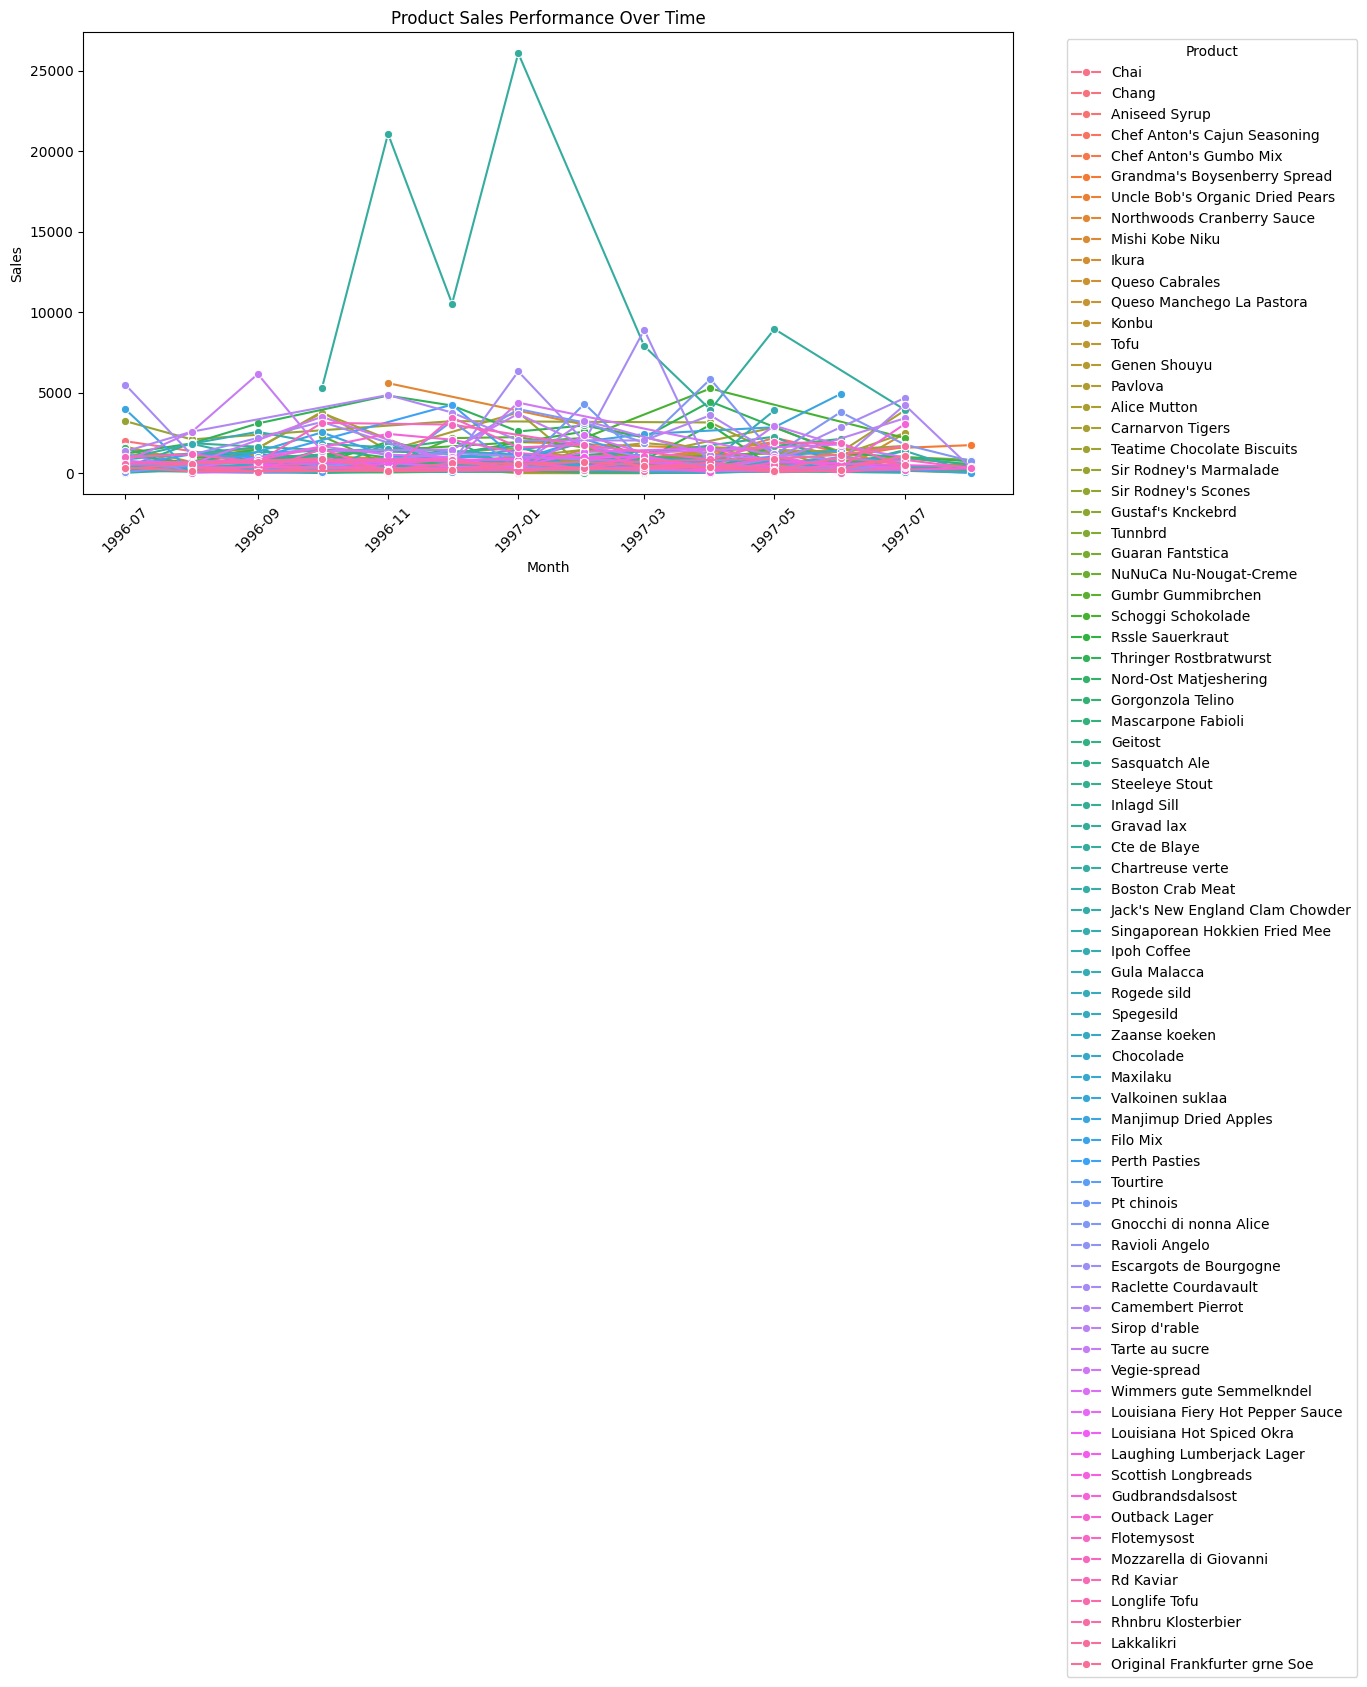

In [107]:
# Convert 'Month' from PeriodDtype to datetime
product_sales['Month'] = product_sales['Month'].dt.to_timestamp()

# Plot product sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_sales, x='Month', y='Sales', hue='productname', marker='o')

# Add title and labels
plt.title('Product Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend placement
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


## Customer Retention Analysis

C:\Users\Hp\AppData\Local\Temp\ipykernel_616\2886422966.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_sales, x='CustomerSegment', palette='Set2')


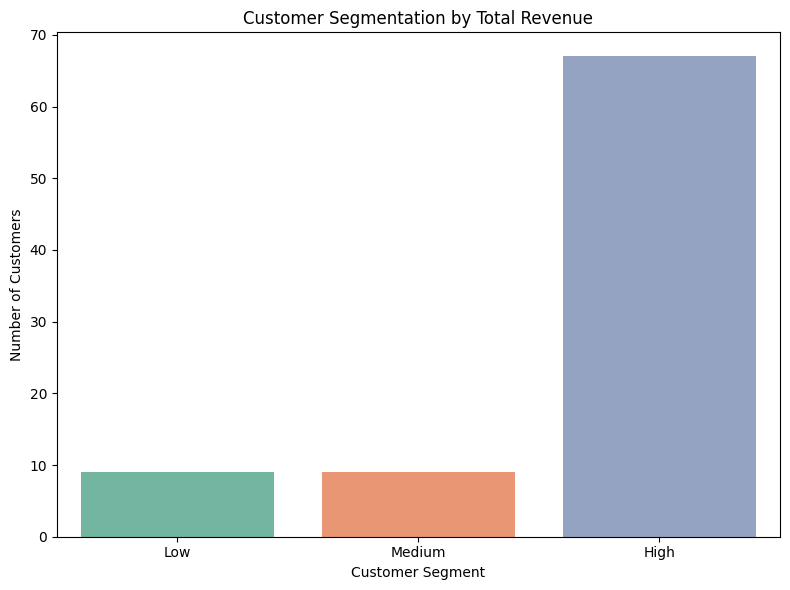

In [108]:
# Calculate total revenue and number of orders for each customer
customer_sales = data.groupby('customerid').agg(
    total_revenue=('Sales', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()

# Segment customers into high, medium, and low value based on total revenue
customer_sales['CustomerSegment'] = pd.cut(
    customer_sales['total_revenue'],
    bins=[0, 500, 1000, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Visualize the distribution of customer segments
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_sales, x='CustomerSegment', palette='Set2')
plt.title('Customer Segmentation by Total Revenue')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()



C:\Users\Hp\AppData\Local\Temp\ipykernel_616\3621903431.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_retention, x='RetentionStatus', palette='coolwarm')


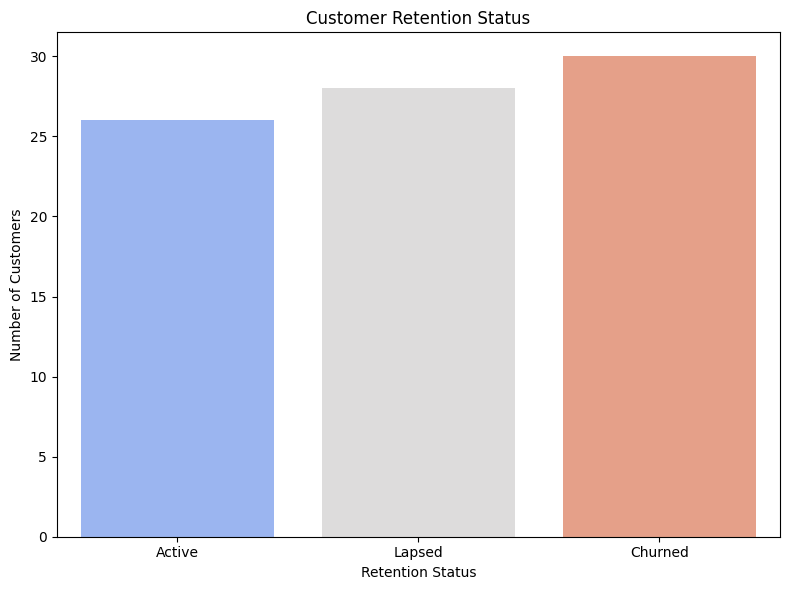

In [109]:
# Retention: Calculate customers active in recent periods
# Create a column to track the recency of purchases
latest_order = data.groupby('customerid')['orderdate'].max().reset_index()
latest_order['Recency'] = (latest_order['orderdate'].max() - latest_order['orderdate']).dt.days

# Classify customers based on recency (e.g., active, lapsed)
latest_order['RetentionStatus'] = pd.cut(
    latest_order['Recency'],
    bins=[0, 30, 90, float('inf')],
    labels=['Active', 'Lapsed', 'Churned']
)

# Merge with customer sales data
customer_retention = pd.merge(customer_sales, latest_order[['customerid', 'RetentionStatus']], on='customerid')

# Visualize retention status
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_retention, x='RetentionStatus', palette='coolwarm')
plt.title('Customer Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


* Customer Segmentation based on total revenue shows three segments: Low, Medium, and High.
* Retention is analyzed by classifying customers based on recency (e.g., Active, Lapsed, Churned), and retention status is visualized.